TDS Project: Dataset Selection, EDA, and Basic Model Analysis


Mahmud Hassan 208247825
Khalil Hamody 212923775


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting plot styles
sns.set_theme(style="whitegrid")
%matplotlib inline

In [3]:
# Loading the dataset
data = pd.read_csv('/content/drive/MyDrive/TDS-CARS-MSRP/data.csv')

# Displaying the first few rows
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


Check Dataset Information
Understand the structure, types of data, and missing values.

In [4]:
# Display basic information about the dataset
print(data.info())

# Summary statistics of numerical columns
print(data.describe())

# Check for missing values
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

# **Observations:**
**Columns with Missing Values:**
1.   **Engine Fuel Type:** 3 missing values.
2.   **Engine HP:** 69 missing values.
3.   **Engine Cylinders:** 30 missing values.
4.   **Number of Doors:** 6 missing values.
5.   **Market Category:** 3742 missing values.

**Other Details:**
No missing values in critical columns like MSRP (target column), Make, or Model.


# **Handling Missing Values:**
**1. Engine Fuel Type:**

Missing values: 3

**Action:** Fill with the most frequent value (mode).

In [5]:
data['Engine Fuel Type'].fillna(data['Engine Fuel Type'].mode()[0], inplace=True)


<ipython-input-5-1cb47e837953>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Engine Fuel Type'].fillna(data['Engine Fuel Type'].mode()[0], inplace=True)


**2. Engine HP and Engine Cylinders:**

Missing values: 69 and 30

**Action:** Fill with the median value since these are numerical and likely skewed.

In [6]:
data['Engine HP'].fillna(data['Engine HP'].median(), inplace=True)
data['Engine Cylinders'].fillna(data['Engine Cylinders'].median(), inplace=True)


<ipython-input-6-d93c8716cd3d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Engine HP'].fillna(data['Engine HP'].median(), inplace=True)
<ipython-input-6-d93c8716cd3d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

**3. Number of Doors:**

**Missing values:** 6
**Action:** Fill with the median value

In [7]:
data['Number of Doors'].fillna(data['Number of Doors'].median(), inplace=True)


<ipython-input-7-f7cf70cce1fc>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Number of Doors'].fillna(data['Number of Doors'].median(), inplace=True)


**4. Market Category:**

**Missing values:** 3742

**Action:** Since a large portion is missing, drop this column as it may not contribute significantly to prediction.

In [8]:
data.drop(columns=['Market Category'], inplace=True)


In [9]:
print(data.isnull().sum())


Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64


# **1. Histogram of MSRP**
**Purpose:**
To understand the distribution of car prices in the dataset. This helps identify outliers, skewness, and overall price range.

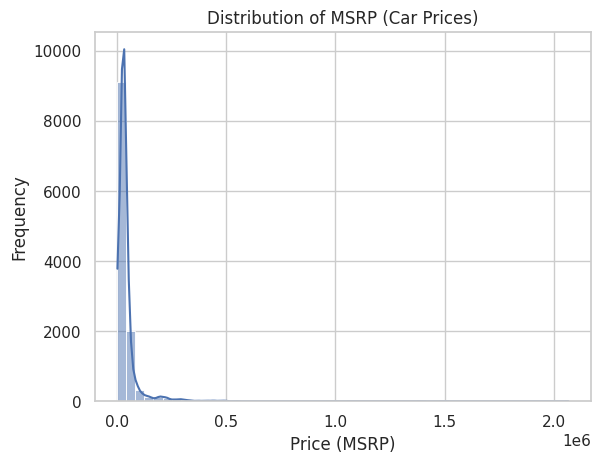

In [15]:
sns.histplot(data['MSRP'], bins=50, kde=True)
plt.title("Distribution of MSRP (Car Prices)")
plt.xlabel("Price (MSRP)")
plt.ylabel("Frequency")
plt.show()
